# ДЗ №3 Гладышев В.В.

## Задание № 1

Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error
import os

In [2]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [3]:
import itertools

In [4]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

In [5]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 13 columns):
Time               145374 non-null object
PJME_MW            145374 non-null float64
year               145374 non-null int64
month              145374 non-null int64
dayofmonth         145374 non-null int64
quarter            145374 non-null int64
dayofyear          145374 non-null int64
weekofyear         145374 non-null int64
dayofweek          145374 non-null int64
hour               145374 non-null int64
is_holiday         145374 non-null int64
is_prev_holiday    145374 non-null int64
is_next_holiday    145374 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 15.5+ MB


In [7]:
data_m = data.resample('M').mean()

In [8]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2002-01-31 to 2018-08-31
Freq: M
Data columns (total 12 columns):
PJME_MW            200 non-null float64
year               200 non-null float64
month              200 non-null float64
dayofmonth         200 non-null float64
quarter            200 non-null float64
dayofyear          200 non-null float64
weekofyear         200 non-null float64
dayofweek          200 non-null float64
hour               200 non-null float64
is_holiday         200 non-null float64
is_prev_holiday    200 non-null float64
is_next_holiday    200 non-null float64
dtypes: float64(12)
memory usage: 20.3 KB


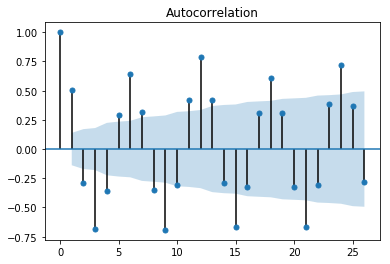

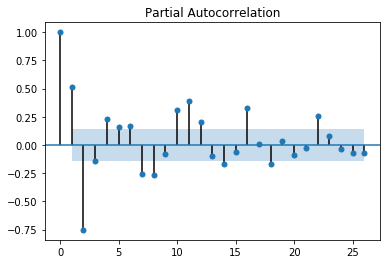

In [9]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=26)
plt.show()

In [10]:
import warnings

# Определим p, d и q 
p = 0
q = 2
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с месячными данными, тогда сезонность это 12 месяцев
qs = 1
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs ,12] 

In [11]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [0, 2, 2]    : ps,ds,qs, S= [0, 0, 1, 12]


In [12]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],
                                order = pdq,
                                seasonal_order = seasonal_pdq,
                                enforce_stationarity = False,
                                enforce_invertibility = False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 2, 2]x[0, 0, 1, 12] - AIC:3208.817163475729


In [13]:
print(results.summary().tables[0], "\n", results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 2, 2)x(0, 0, 1, 12)   Log Likelihood               -1600.409
Date:                            Fri, 12 Jun 2020   AIC                           3208.817
Time:                                    09:21:26   BIC                           3221.384
Sample:                                         0   HQIC                          3213.916
                                            - 188                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7116      0.117     -6.061      0.000      -0.942      -0.481
ma.L2         -0.2667      0.107   

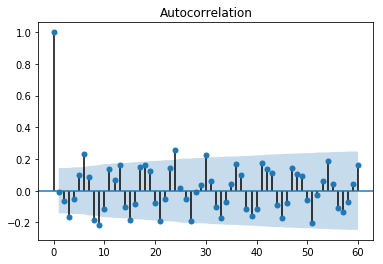

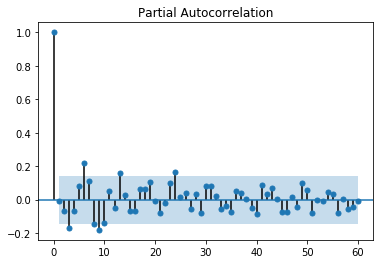

In [14]:
sm.graphics.tsa.plot_acf(results.resid, lags=60)
plt.show()
sm.graphics.tsa.plot_pacf(results.resid, lags=60)
plt.show()

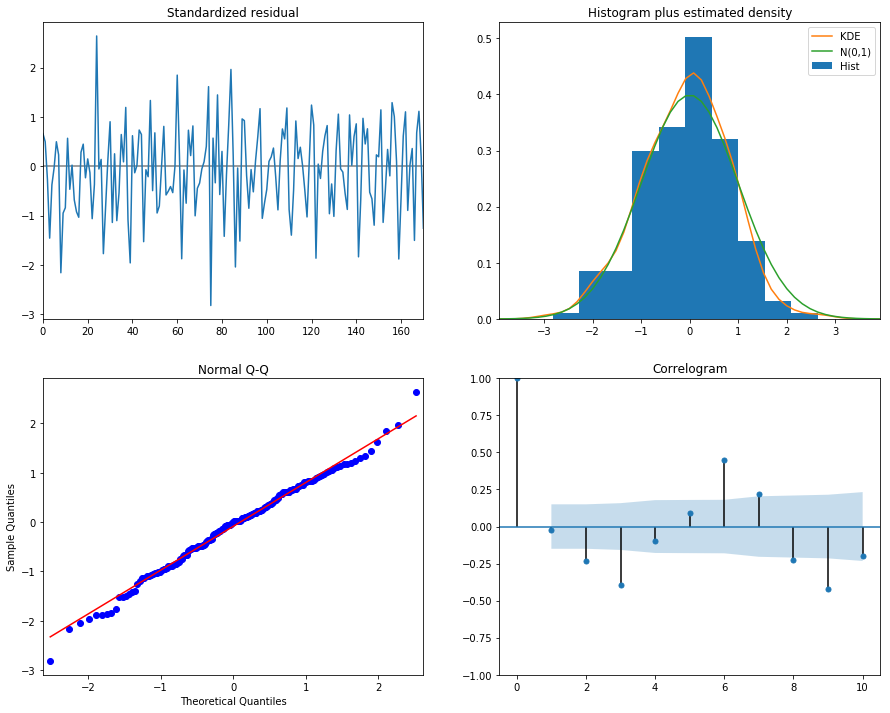

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Ну, почти :) Только correlogram'ма картинку несколько портит

## Задание № 2

Подберите параметры модели SARIMAX для этого ряда.

In [16]:
# Определим d и q в диапазоне 0-3
p = [0]
d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

In [17]:
# зададим сезонность p, q и q
p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [18]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [19]:
# warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4699.195491264933
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4290.040464872541
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3987.1764435564096
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3372.7214168798077
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:3143.066928715245
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2904.746490569514
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4534.039921070002
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4225.3384675130965
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3947.2810695606086
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3330.6866857595205
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:3103.4708140327793
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2869.803852147439
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4478.921088805275
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3913.4801598443037
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3924.8044087721582
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3315.6786725106003
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:3087.8480678871842
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2854.2202541760416
ARIMA(0, 1, 0)x(0

Лучшие результаты на месячных данных параметры модели SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:2845.07 (для p,q,d,ps,ds,qs).

In [20]:
#для построения модели используем все данные, кроме 12-ти последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения
N2=12  # число точек для теста

mod_m = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-N2],
                                  order = [0, 1, 2],
                                  seasonal_order = [0, 1, 2, 12],
                                  enforce_stationarity = False,
                                  enforce_invertibility = False)
results_opt_m = mod_m.fit()
print('AIC:{}',results_opt_m.aic)

AIC:{} 2613.0075361037107


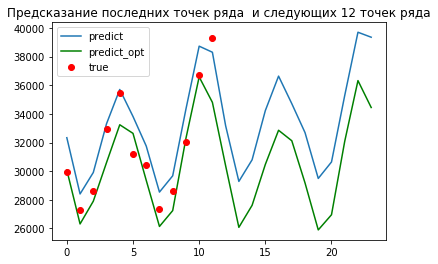

In [21]:
nforecast = N2+12  # полное число предиктов (тест+ чистый предикт)

pred_dynamic = results.forecast(nforecast)    #делаем предсказание на 12 точtк от текущего конца ряда
pred_dynamic_opt_m = results_opt_m.forecast(nforecast)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt_m,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()

plt.show()

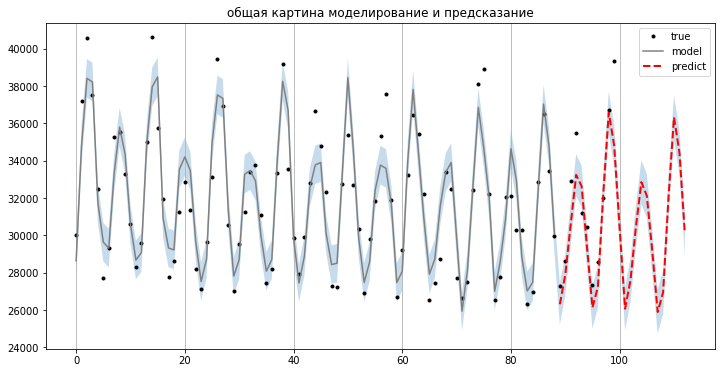

In [22]:
N3 = 100 # 400  # отступ данных для отображения  модели (для улучшения визуальных качеств рисунка - берем из интервала [0-500])
nforecast = N2+12  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt_m.get_prediction(end=results_opt_m.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_m['PJME_MW'].values[N3:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

## Задание № 3

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [23]:
data_w = data.resample('W').mean()

In [24]:
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения
N1 = 0 #300   # берем дданные не от начала - так быстрее работает
N2=12  # число точек для теста
nforecast = N2+30

mod_w = sm.tsa.statespace.SARIMAX(data_w['PJME_MW'].values[N1:-N2],order=[0,0,1],
                                seasonal_order=[0,1,2,52] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt_w = mod_w.fit()
print('AIC:{}',results_opt_w.aic)

AIC:{} 12841.099890199512


In [25]:
print(results_opt_w.summary().tables[0], "\n", results_opt_w.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  854
Model:             SARIMAX(0, 0, 1)x(0, 1, 2, 52)   Log Likelihood               -6416.550
Date:                            Fri, 12 Jun 2020   AIC                          12841.100
Time:                                    09:23:47   BIC                          12859.281
Sample:                                         0   HQIC                         12848.130
                                            - 854                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3587      0.043      8.411      0.000       0.275       0.442
ma.S.L52      -0.6220      0.039   

In [26]:
print(results_opt_m.summary().tables[0], "\n", results_opt_m.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1301.504
Date:                            Fri, 12 Jun 2020   AIC                           2613.008
Time:                                    09:23:47   BIC                           2627.994
Sample:                                         0   HQIC                          2619.096
                                            - 188                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6040      0.089     -6.749      0.000      -0.779      -0.429
ma.L2         -0.3402      0.086   

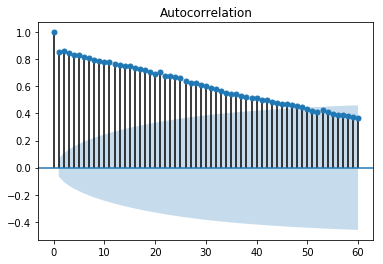

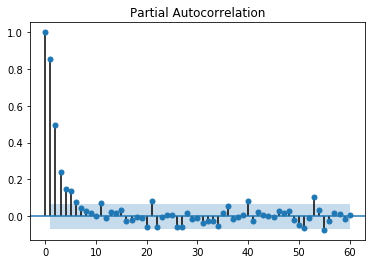

In [27]:
sm.graphics.tsa.plot_acf(results_opt_w.resid, lags=60)
plt.show()
sm.graphics.tsa.plot_pacf(results_opt_w.resid, lags=60)
plt.show()

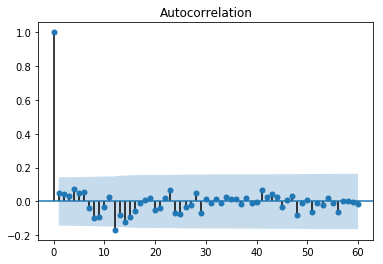

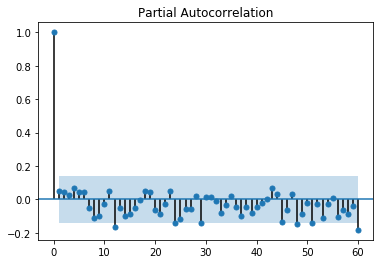

In [28]:
sm.graphics.tsa.plot_acf(results_opt_m.resid, lags=60)
plt.show()
sm.graphics.tsa.plot_pacf(results_opt_m.resid, lags=60)
plt.show()

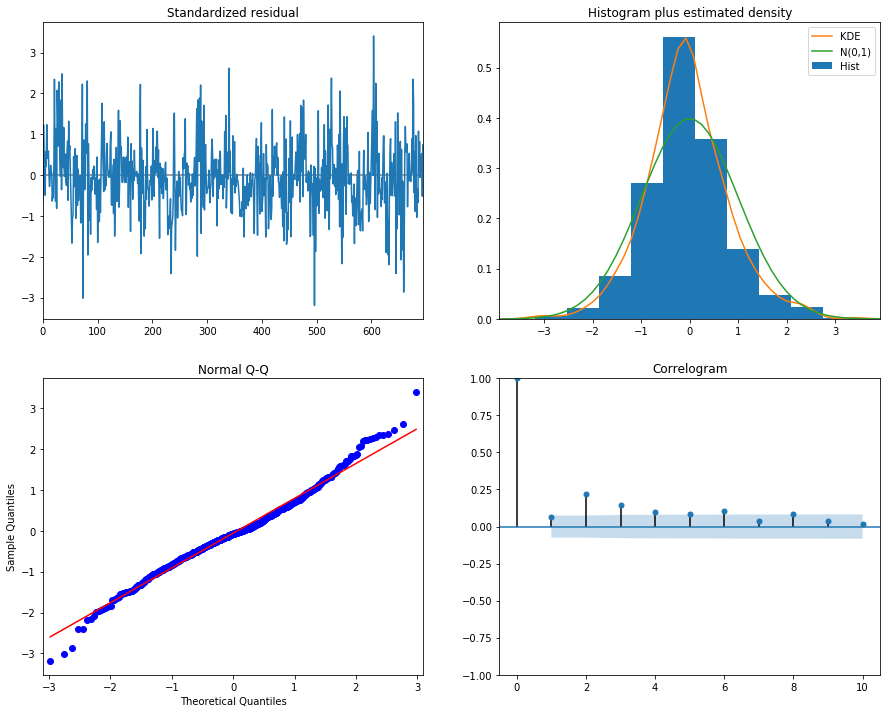

In [29]:
results_opt_w.plot_diagnostics(figsize=(15, 12))
plt.show()

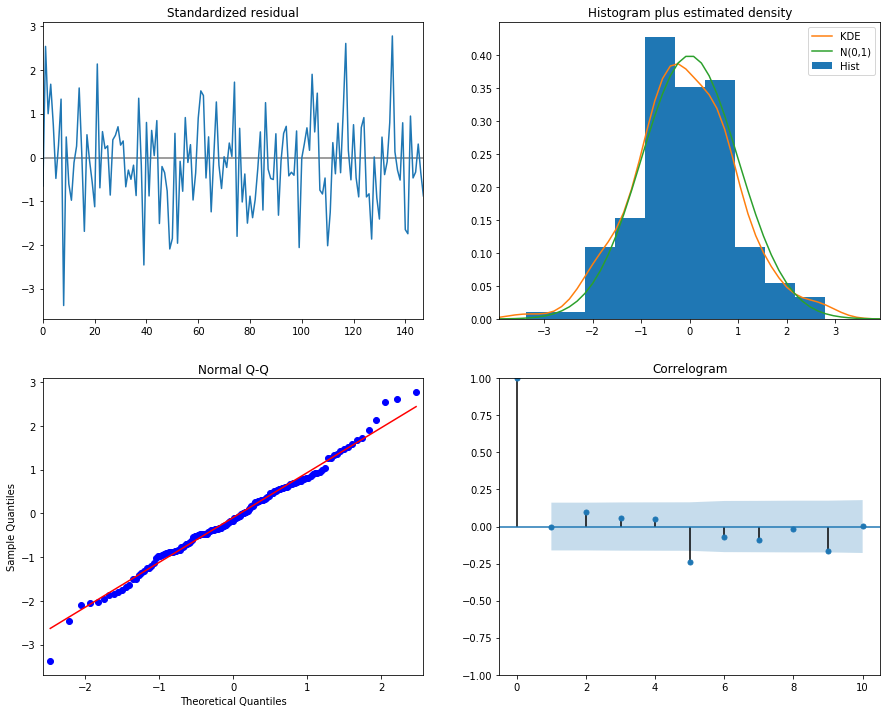

In [30]:
results_opt_m.plot_diagnostics(figsize=(15, 12))
plt.show()

__Снизилась вложенная периодичность (день, неделя, год) за счёт увеличени дискреты (т.е. день и неделя были усреднены). SARIMAX практически полностью компенсировал периодичность (гораздо сильнее, чем на недельном сэмпле). Распределение остатков стало более близким к нормальному. Это видно на гистограмме и на quantile quantile plot. Лучше удалось выделить стационарную часть  ряда.__

## Задание № 4

a) Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [31]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])

In [32]:
brent_data_w = brent_data.resample('W').mean()

In [33]:
brent_data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 11 columns):
Значение           469 non-null float64
year               469 non-null float64
month              469 non-null float64
dayofmonth         469 non-null float64
quarter            469 non-null float64
dayofyear          469 non-null float64
weekofyear         469 non-null float64
dayofweek          469 non-null float64
is_holiday         469 non-null float64
is_prev_holiday    469 non-null float64
is_next_holiday    469 non-null float64
dtypes: float64(11)
memory usage: 44.1 KB


In [34]:
brent_data_w.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.00000,469.000000,469.000000,469.000000,469.000000
mean,80.712938,2014.668799,6.534790,15.769225,2.510448,183.502452,26.54371,2.517662,0.027505,0.027150,0.030419
std,26.661299,2.627031,3.410980,7.038383,1.105197,104.223962,15.04838,0.316618,0.063859,0.064381,0.068258
min,28.690000,2010.000000,1.000000,3.000000,1.000000,4.200000,1.00000,1.500000,0.000000,0.000000,0.000000
25%,56.206000,2012.000000,4.000000,9.666667,2.000000,93.666667,14.00000,2.500000,0.000000,0.000000,0.000000
50%,76.601667,2015.000000,6.833333,16.000000,2.800000,183.666667,27.00000,2.666667,0.000000,0.000000,0.000000
75%,108.114000,2017.000000,9.333333,22.000000,3.333333,272.666667,39.00000,2.666667,0.000000,0.000000,0.000000
max,125.006667,2019.000000,12.000000,29.500000,4.000000,363.500000,53.00000,4.333333,0.200000,0.250000,0.250000


In [35]:
brent_data_w[brent_data_w['Значение'].isnull()].index

DatetimeIndex(['2011-10-16'], dtype='datetime64[ns]', name='Дата', freq='W-SUN')

#### Вот же она - ловушка :)

In [36]:
brent_data_w.loc['2011-10-16', 'Значение']

nan

In [37]:
brent_data_w.loc['2011-10-01':'2011-10-30', 'Значение']

Дата
2011-10-02    103.878333
2011-10-09    103.476667
2011-10-16           NaN
2011-10-23    109.756667
2011-10-30    110.680000
Freq: W-SUN, Name: Значение, dtype: float64

In [38]:
brent_data.loc['2011-10-01':'2011-10-30', 'Значение']

Дата
2011-10-02    101.40
2011-10-03    100.69
2011-10-04    101.96
2011-10-05    102.77
2011-10-06    105.40
2011-10-07    105.91
2011-10-09    104.13
2011-10-20    109.93
2011-10-21    109.79
2011-10-23    109.55
2011-10-24    111.20
2011-10-25    111.02
2011-10-26    109.50
2011-10-27    112.35
2011-10-28    110.16
2011-10-30    109.85
Name: Значение, dtype: float64

In [39]:
brent_data_w.dropna(inplace = True)

In [40]:
brent_data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 469 entries, 2010-09-05 to 2019-09-01
Data columns (total 11 columns):
Значение           469 non-null float64
year               469 non-null float64
month              469 non-null float64
dayofmonth         469 non-null float64
quarter            469 non-null float64
dayofyear          469 non-null float64
weekofyear         469 non-null float64
dayofweek          469 non-null float64
is_holiday         469 non-null float64
is_prev_holiday    469 non-null float64
is_next_holiday    469 non-null float64
dtypes: float64(11)
memory usage: 44.0 KB


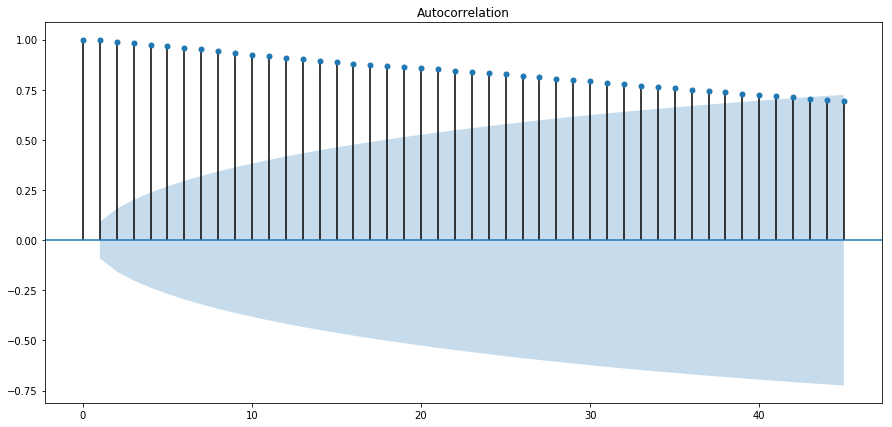

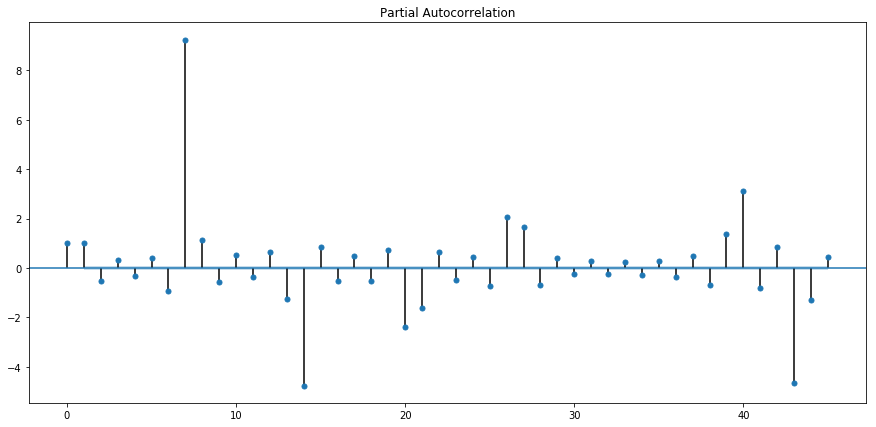

In [41]:
with plt.rc_context():
    plt.rc("figure", figsize=(15, 7))
    sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=45)
    sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=45)
    plt.show()

In [42]:
# from statsmodels.tsa.arima_model import ARIMA

In [43]:
# warnings.filterwarnings("ignore") # отключает предупреждения
# for param in pdq:
#     try:
#         mod_ba = ARIMA(brent_data_w['Значение'].values, order = param)
#         results = mod_ba.fit()
#         print('ARIMA{} - AIC:{}'.format(param, results.aic))
#     except:
#         print(f"except: {param}\n")
#         continue

In [44]:
# Определим d и q в диапазоне 0-3
d = p = range(0, 3)
q = [32, 37, 42]
# зададим сетку p, d, q
pdq = list(itertools.product(p, d, q))
# pdq

In [45]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    try:
        mod_b = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values,
                                          order = param,
                                          seasonal_order = [0, 0, 0, 0],
                                          trend = 'ct',
                                          enforce_stationarity = False,
                                          enforce_invertibility = False)
        results = mod_b.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

ARIMA(0, 0, 32) - AIC:2254.6644937974343
ARIMA(0, 0, 37) - AIC:2216.874485626699
ARIMA(0, 0, 42) - AIC:2235.946530037718
ARIMA(0, 1, 32) - AIC:1912.7118838891124
ARIMA(0, 1, 37) - AIC:1877.7433502524827
ARIMA(0, 1, 42) - AIC:1855.6769803505374
ARIMA(0, 2, 32) - AIC:1968.504200248978
ARIMA(0, 2, 37) - AIC:1948.3755027033712
ARIMA(0, 2, 42) - AIC:1917.7888577573763
ARIMA(1, 0, 32) - AIC:1916.0102588375407
ARIMA(1, 0, 37) - AIC:1882.5856113666152
ARIMA(1, 0, 42) - AIC:1859.8454519179154
ARIMA(1, 1, 32) - AIC:1914.4376303197268
ARIMA(1, 1, 37) - AIC:1881.1631705654586
ARIMA(1, 1, 42) - AIC:1858.507357739396
ARIMA(1, 2, 32) - AIC:1968.2077538143346
ARIMA(1, 2, 37) - AIC:1915.058210549381
ARIMA(1, 2, 42) - AIC:1906.4942466197704
ARIMA(2, 0, 32) - AIC:1917.6482904534857
ARIMA(2, 0, 37) - AIC:1886.2639910122844
ARIMA(2, 0, 42) - AIC:1863.922854034377
ARIMA(2, 1, 32) - AIC:1915.7004188388842
ARIMA(2, 1, 37) - AIC:1882.570351246386
ARIMA(2, 1, 42) - AIC:1858.191023622768
ARIMA(2, 2, 32) - AIC:19

Лучшие результаты на месячных данных параметры модели ARIMA(0, 1, 42) - AIC:1855.67  (для p,q,d)  (ARIMA(0, 1, 2) - AIC:2025.99).

In [46]:
#для построения модели используем все данные, кроме 12-ти последних недель (это будет тестовый набор)
# warnings.filterwarnings("ignore") # отключает предупреждения
N2=12  # число точек для теста

mod_b = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values[:-N2],
                                  order = [0, 1, 42],
                                  seasonal_order = [0, 0, 0, 0],
                                  trend = 'ct',
                                  enforce_stationarity = False,
                                  enforce_invertibility = False)
results_opt_b = mod_b.fit()
print('AIC:{}', results_opt_b.aic)

AIC:{} 1805.7445269897146


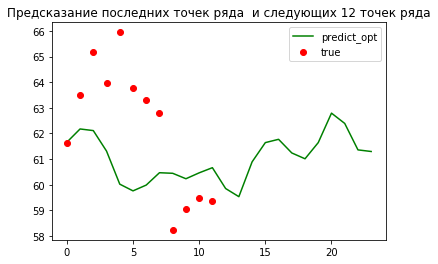

In [49]:
nforecast = N2+12  # полное число предиктов (тест+ чистый предикт)

pred_dynamic_opt_b = results_opt_b.forecast(nforecast)

plt.plot(pred_dynamic_opt_b,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data_w['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()

plt.show()

## Задание № 5

Оцените результат моделирования

В ряде BRENT очень маленькая глубина корреляции (текущее значение сильно свзано только с несколькими предшествующими). Чем меньше дискретизация тем больше связанных значений. При недельной дискретности первые разности не выражены (pacf). Циклическая составляющая в ряде отсутствует. Осталась только трендовая составляющая. В модели задан высокий уровень сглаживания. Фактически модель свелась к скользщему среднему

## Задание № 6

Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

In [ ]:
Регрессионные модели должны быть эффективны в процессах с сильной зависимостью и низкой стохастической составляющей.